<a href="https://colab.research.google.com/github/lightweightcobra/Machine-Learning/blob/main/ADITYA_KUMAR_CS652_LAB_2_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> IIIT Vadodara </center>
## <center> Winter 2023-24 </center>
## <center> CS/IT 308, CS 652, CS8XX Machine Learning Lab </center>
## <center> Lab#2 Bayes' classifier, k-means and k-NN</center>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import math
from sklearn import datasets
from sklearn.model_selection import train_test_split

## 1. Bayesian decision rule under normality assumption
Hint: use classnote for same

### Consider the following data:
Here, second column represent the class

In [ ]:
dataset = np.array([[3.39,0],[3.58,0],[2.28,0],[7.42,1],[5.74,1],[9.17,1],[7.79,1],[7.93,1],[1.34,0],[3.11,0]])
print('Feature|Classe')
print(dataset)

Feature|Classe
[[3.39 0.  ]
 [3.58 0.  ]
 [2.28 0.  ]
 [7.42 1.  ]
 [5.74 1.  ]
 [9.17 1.  ]
 [7.79 1.  ]
 [7.93 1.  ]
 [1.34 0.  ]
 [3.11 0.  ]]


### Find class probability $P_1$ and $P_2$

In [ ]:
# Write code here
class1 = 0
class2 = 0
n = len(dataset)
for i in dataset:
  if i[1] == 0:
    class1 += 1
  else: class2 += 1

total_class = class1 + class2
prob_class_1 = class1/ total_class
prob_class_2 = class2/total_class

print(" The Probability - P1 : ", prob_class_1)
print(" The Probability - P2 : ", prob_class_2)

 The Probability - P1 :  0.5
 The Probability - P2 :  0.5


### Find sample mean and sample standard deviation for each class

In [ ]:
# Write code here
sum1 = 0
sum1_size = 0
sum2 = 0
sum2_size = 0

for i in dataset:
  if i[1] == 0:
    sum1 += i[0]
    sum1_size += 1
  else:
    sum2 += i[0]
    sum2_size += 1

mean_1 = sum1/sum1_size
mean_2 = sum2/sum2_size

sum_std1 = 0
sum_std2 = 0

for i in dataset:
  if i[1] == 0:
    sum_std1 += (i[0] - mean_1)**2
  else:
    sum_std2 += (i[0] - mean_2)**2

sum_std1 /= sum1_size-1
sum_std1 = np.sqrt(sum_std1)

sum_std2 /= sum2_size-1
sum_std2 = np.sqrt(sum_std2)

print(" The Mean for Class - 1 : ", mean_1)
print(" The Standard Deviation for Class - 1 : ", sum_std1)
print("\n The Mean for Class - 2 : ", mean_2)
print(" The Standard Deviation for Class - 2 : ",sum_std2)

 The Mean for Class - 1 :  2.7399999999999998
 The Standard Deviation for Class - 1 :  0.9269034469673743

 The Mean for Class - 2 :  7.609999999999999
 The Standard Deviation for Class - 2 :  1.2350506062506101


### Plot $p_1(x)$ and $p_2(x)$

In [ ]:
def calculate_probability(x, mean, stdev):
    exp = np.exp(-((x - mean) ** 2) / (2 * stdev ** 2))
    return (1 / (np.sqrt(2 * np.pi) * stdev)) * exp


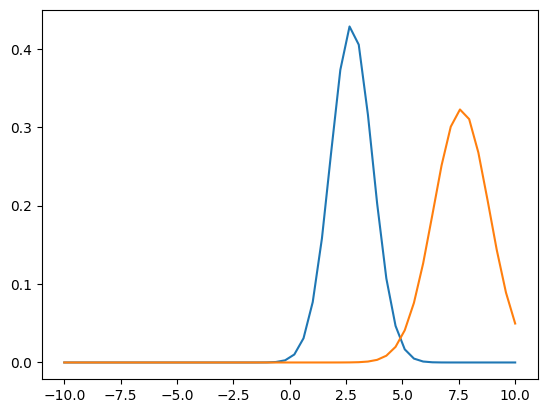

In [ ]:
# Write code here to plot
x = np.linspace(-10, 10)
y = calculate_probability(x, mean_1, sum_std1)
plt.plot(x, y)
x = np.linspace(-10, 10)
y = calculate_probability(x, mean_2, sum_std2)
plt.plot(x, y)
plt.show()


### Test for $x=3$  and $x=5$

In [ ]:
# For x=3
# Write code here
x = [3]
y1 = calculate_probability(x, mean_1, sum_std1)
y2 = calculate_probability(x, mean_2, sum_std2)
if y1 > y2:
  print("The number belongs to class 0")
else: print("The number belongs to class 1")

The number belongs to class 0


In [ ]:
# For x=5
# Write code here
x = [5]
y1 = calculate_probability(x, mean_1, sum_std1)
y2 = calculate_probability(x, mean_2, sum_std2)
if y1 > y2:
  print("The number belongs to class 0")
else: print("The number belongs to class 1")



The number belongs to class 1


## Part-2:
1. Try for this 2-D data using classnote.
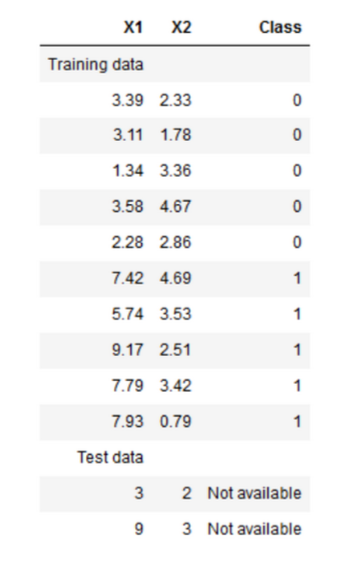
2. Implement Bayesian classifier for iris data.
You can get help from following link. https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/

In [ ]:
# 1. Trying it for 2D
dataset2 = np.array([[3.39, 2.33, 0],
                     [3.11, 1.78, 0],
                     [1.34, 3.36, 0],
                     [3.58, 4.67, 0],
                     [2.28, 2.86, 0],
                     [7.42, 4.69, 1],
                     [5.74, 3.53, 1],
                     [9.17, 2.51, 1],
                     [7.79, 3.42, 1],
                     [7.93, 0.79, 1]])

def separate_by_class(dataset):
    separated = {}
    for row in dataset:
        class_value = row[-1]
        if class_value not in separated:
            separated[class_value] = []
        separated[class_value].append(row)
    return separated

def summarize_dataset(dataset):
    summaries = [(np.mean(column), np.std(column)) for column in zip(*dataset)]
    del summaries[-1]
    return summaries

def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = {}
    for class_value, instances in separated.items():
        summaries[class_value] = summarize_dataset(instances)
    return summaries

def calculate_probability(x, mean, stdev):
    exp = np.exp(-((x - mean) ** 2 / (2 * stdev ** 2)))
    return (1 / (np.sqrt(2 * np.pi) * stdev)) * exp

def calculate_class_probabilities(summaries, input_vector):
    probabilities = {}
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = 1
        for i in range(len(class_summaries)):
            mean, stdev = class_summaries[i]
            x = input_vector[i]
            probabilities[class_value] *= calculate_probability(x, mean, stdev)
    return probabilities

def predict(summaries, input_vector):
    probabilities = calculate_class_probabilities(summaries, input_vector)
    best_label, best_prob = None, -1
    for class_value, probability in probabilities.items():
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = class_value
    return best_label

def get_predict(summaries, test_set):
    predictions = []
    for row in test_set:
        result = predict(summaries, row)
        predictions.append(result)
    return predictions

test_data = np.array([[3, 2], [9, 3]])
summaries = summarize_by_class(dataset2)

predictions = get_predict(summaries, test_data)
print(predictions)

[0.0, 1.0]


In [ ]:
# Write code here
# use datasets.load_iris()
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def separate_by_class(X, y):
    separated = {}
    for i in range(len(X)):
        class_value = y[i]
        if class_value not in separated:
            separated[class_value] = []
        separated[class_value].append(X[i])
    return separated

def summarize_by_class(X, y):
    separated = separate_by_class(X, y)
    summaries = {}
    for class_value, instances in separated.items():
        summaries[class_value] = summarize_dataset(instances)
    return summaries

summaries = summarize_by_class(X_train, y_train)

predictions = get_predict(summaries, X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: ", accuracy)


Accuracy:  0.8888888888888888


## Part 3
Repeat the  Bayesian classifier with the points given in the Assignment 01

In [ ]:
# Write code here
def calc_prob(x, mean, covar):
    px = (1 / (2 * np.pi * np.sqrt(np.linalg.det(covar)))) * np.exp(-0.5 * np.sum(np.dot((x - mean), np.linalg.inv(covar)) * (x - mean), axis=1))
    return px

P1 = P2 = P3 = 1 / 3
u1, u2, u3 = np.array([0, 0]), np.array([0, 1]), np.array([2, 0])
covar = np.array([[1, 0], [0, 1]])

test_data = np.array([[1, 1], [2, 1], [1, 2], [-1, -1], [-2, 1], [2, -1]])

test_p1 = calc_prob(test_data, u1, covar)
test_p2 = calc_prob(test_data, u2, covar)
test_p3 = calc_prob(test_data, u3, covar)

for i, test in enumerate(test_data):
  if P1 * test_p1[i] >= P2 * test_p2[i] and P1 * test_p1[i] >= P3 * test_p3[i]:
    print(f'{test} belongs to class1')
  elif P2 * test_p2[i] >= P1 * test_p1[i] and P2 * test_p2[i] >= P3 * test_p3[i]:
    print(f'{test} belongs to class2')
  else:
    print(f'{test} belongs to class3')

[1 1] belongs to class2
[2 1] belongs to class3
[1 2] belongs to class2
[-1 -1] belongs to class1
[-2  1] belongs to class2
[ 2 -1] belongs to class3


## 2. K-Nearest neighbour (KNN)

Consider the following observations:
<br>
>Sr.No. | Feature 1 | Feature 2 | Class
>--- | --- | --- | ---
Training data
>1 | -2 | -1 | C1
>2 | -2 |  1 | C2
>3 | -2 |  2 | C2
>4 | -1 | -1 | C1
>5 |  1 | -1 | C1
>6 |  1 |  1 | C3
>7 |  1 |  2 | C3
>8 |  2 |  1 | C3
Test data
>1 | -1 |  1 | Not available

Use KNN technique to classify the test data using K=3.

Hint:
<br>
1) Calculate the Euclidean distance between the new point and the existing points.
<br>
2) Sort out the points distance-wise.
<br>
3) Now select the k-neighbours.

In [ ]:
data = np.float32([[-2,-1,1],[-2,1,2],[-2,2,2],[-1,-1,1],[1,-1,1],[1,1,3],[1,2,3],[2,1,3]])
print('Feature1|Feature2|Class')
print(data)

Feature1|Feature2|Class
[[-2. -1.  1.]
 [-2.  1.  2.]
 [-2.  2.  2.]
 [-1. -1.  1.]
 [ 1. -1.  1.]
 [ 1.  1.  3.]
 [ 1.  2.  3.]
 [ 2.  1.  3.]]


In [ ]:
# Write code here
test_data = np.array([[-1, 1]])
k = 3
def euclid_dist(point1, point2):
  return np.sqrt(np.sum((point1[:-1] - point2) ** 2))

def find_neighbour(data, test_data, k):
  distance = []
  for i in range(len(data)):
    dist = euclid_dist(data[i], test_data)
    distance.append((dist, data[i][-1]))
  distance.sort()
  neighbour = [distance[i][1] for i in range(k)] # for k nearest neighbour
  return neighbour

def predict_class(neighbour):
  class_votes = {}
  for nei in neighbour:
    if nei in class_votes:
      class_votes[nei] += 1
    else: class_votes[nei] = 1

  max_votes = 0
  predicted_class = None

  for class_value, votes in class_votes.items():
    if votes > max_votes:
      max_votes = votes
      predicted_class = class_value

  return predicted_class



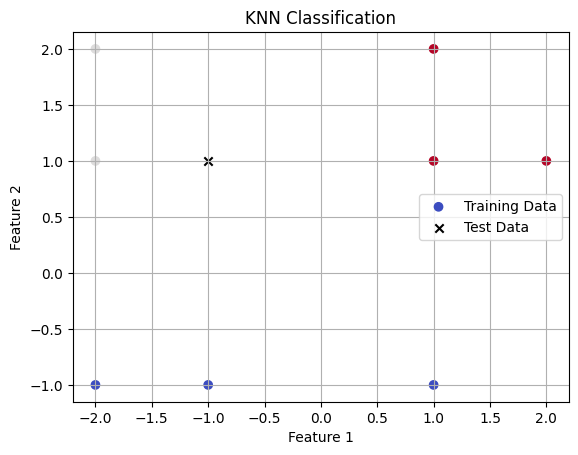

In [ ]:
# Plot the graph here
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(data[:, 0], data[:, 1], c=data[:, 2], cmap=plt.cm.coolwarm, label='Training Data')
plt.scatter(test_data[:, 0], test_data[:, 1], marker='x', color='black', label='Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Classification')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# Find the class that would be assigned to the test data
nearest_neighbour = find_neighbour(data, test_data, k)
predicted_class = predict_class(nearest_neighbour)
print("The predicted class is: ",predicted_class)

The predicted class is:  2.0


In [ ]:
# Now verify your result by utilising sklearn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(data[:, :2], data[:, 2])

sklearn_predicted_class = knn.predict(test_data)

print("Sklearn Prediction: ", sklearn_predicted_class)


Sklearn Prediction:  [2.]


## 3. K-Means

Ignore the class information of the training data given in problem 2 and use K-means algorithm to classify the same. Assume the initial starting classes as:  
<br>
C1={observations 1,2}
<br>
C2={observations 3,4,5}
<br>
C3={observations 6,7,8}
<br>

Now using the result find the class that would be assigned to the test data.

<br>
Hint:

1) Find the centroid (mean) of each cluster based on the initial classes assignment given.

2) Find out the Euclidean distance between each point and each cluster centroid.

3) Assign all the points to the closest cluster centroid.

4) Recompute centroids of newly formed clusters.

5) Stop if the new centroids are same as old centroids else repeat step 2 to 4.

In [ ]:
X = data[:,:-1]
m,n = X.shape

# Write code here
C1 = np.mean(X[:2], axis=0)
C2 = np.mean(X[2:5], axis=0)
C3 = np.mean(X[5:], axis=0)


In [ ]:
# Write code for kmeans
def kMeans(X, C1, C2, C3):
    old_C1, old_C2, old_C3 = np.zeros(C1.shape), np.zeros(C2.shape), np.zeros(C3.shape)
    while not np.array_equal(C1, old_C1) or not np.array_equal(C2, old_C2) or not np.array_equal(C3, old_C3):
        old_C1, old_C2, old_C3 = np.copy(C1), np.copy(C2), np.copy(C3)
        clusters = []
        for i in range(len(X)):
            distances = [np.linalg.norm(X[i] - C1), np.linalg.norm(X[i] - C2), np.linalg.norm(X[i] - C3)]
            cluster = np.argmin(distances)
            clusters.append(cluster)
        clusters = np.array(clusters)
        C1 = np.mean(X[clusters == 0], axis=0)
        C2 = np.mean(X[clusters == 1], axis=0)
        C3 = np.mean(X[clusters == 2], axis=0)
    return clusters, C1, C2, C3

clusters, C1, C2, C3 = kMeans(X, C1, C2, C3)


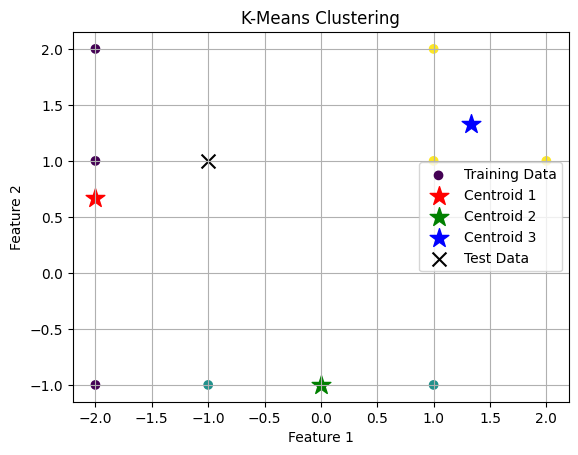

In [ ]:
# Plot the graph here
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', label='Training Data')
# Plot the centroids
plt.scatter(C1[0], C1[1], marker='*', color='red', s=200, label='Centroid 1')
plt.scatter(C2[0], C2[1], marker='*', color='green', s=200, label='Centroid 2')
plt.scatter(C3[0], C3[1], marker='*', color='blue', s=200, label='Centroid 3')
# Plot the test data point
plt.scatter(test_data[0, 0], test_data[0, 1], marker='x', color='black', s=100, label='Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Also, find the class that would be assigned to the test data
test_data = np.array([[-1, 1]])
dist_from_centroids = [np.linalg.norm(test_data - centroid) for centroid in [C1, C2, C3]]
predicted_class = np.argmin(dist_from_centroids) + 1
print(predicted_class)

1


In [ ]:
from sklearn.cluster import KMeans

# Convert input data to double precision
X = np.array(X, dtype=np.float64)

# Convert initialization values to double precision
C1 = np.array(C1, dtype=np.float64)
C2 = np.array(C2, dtype=np.float64)
C3 = np.array(C3, dtype=np.float64)

# Fit K-Means model
kmeans = KMeans(n_clusters=3, init=np.array([C1, C2, C3], dtype=np.float64), n_init=1)
kmeans.fit(X)

# Predict class for test data
sklearn_predicted_class = kmeans.predict(test_data)

print(sklearn_predicted_class[0] + 1)


1
